<a href="https://colab.research.google.com/github/athuly/ProgrammingAssignment2/blob/master/Num_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import tensorflow as tf
from keras.datasets import mnist

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.INFO)

In [0]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
 
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
  

--2019-02-25 03:58:36--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  76.2MB/s    in 2.3s    

2019-02-25 03:58:44 (76.2 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2019-02-25 03:58:44--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  10.4MB/s    in 5.9s    

2019-02-25 03:58:50 (10.4 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [0]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']
  

train_data, train_labels = load_data('train_32x32.mat')
eval_data, eval_labels = load_data('test_32x32.mat')

print("Training Set", train_data.shape, train_labels.shape)
print("Test Set", eval_data.shape, eval_labels.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
# Transpose the image arrays
train_data,train_labels = train_data.transpose((3,0,1,2)), train_labels[:,0]
eval_data, eval_labels = eval_data.transpose((3,0,1,2)), eval_labels[:,0]

print("Training Set", train_data.shape)
print("Test Set", eval_data.shape)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)


In [0]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

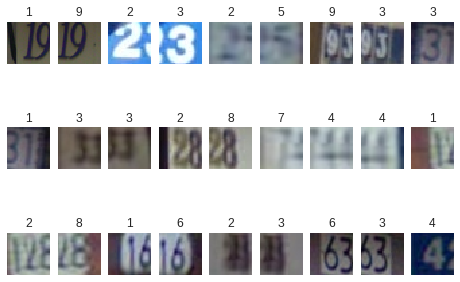

In [0]:
# Plot some training set images
plot_images(train_data, train_labels, 3, 9)

In [0]:
#Converting Label 10 -> 0
train_labels[train_labels == 10] = 0
eval_labels[eval_labels == 10] = 0

In [0]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


##uhjhjh

*   List item
*   List item



In [0]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

train_greyscale = rgb2gray(train_data).astype(np.float32)
test_greyscale = rgb2gray(eval_data).astype(np.float32)
print("Training Set", train_greyscale.shape)
print("Test Set", test_greyscale.shape)
print('')



Training Set (73257, 32, 32, 1)
Test Set (26032, 32, 32, 1)



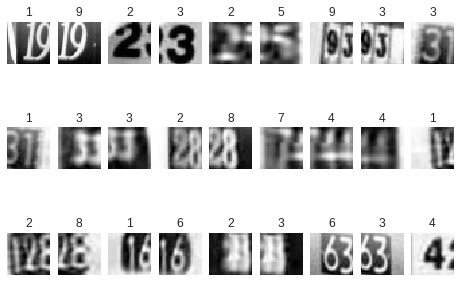

In [0]:
plot_images(train_greyscale, train_labels, 3, 9)


In [0]:
train_greyscale =train_greyscale.reshape(-1, 32, 32, 1)

In [0]:
test_greyscale = test_greyscale.reshape(-1, 32, 32, 1)
InputShape = (32, 32, 1)

In [0]:
train_greyscale = train_greyscale.astype('float32')
test_greyscale = test_greyscale.astype('float32')

In [0]:
train_greyscale /= 255
test_greyscale /= 255

In [0]:
print('train_greyscale shape:', train_greyscale.shape)

train_greyscale shape: (73257, 32, 32, 1)


In [0]:
print('test_greyscale shape:', test_greyscale.shape)

test_greyscale shape: (26032, 32, 32, 1)


In [0]:
num_category = 10

In [0]:
train_labels = keras.utils.to_categorical(train_labels, num_category)
eval_labels = keras.utils.to_categorical(eval_labels, num_category)

## Model Architecture


---


*  Create Sequential Model
*  Add 100 7X7 Convolution Filters w/ ReLU activation
*  Add 10 4 X4 Convolution Filters w/ ReLU activation
*  Add a maxpooling filter of 2 X 2
*  Add a dropout regulation of 25%
*  Flatten output
* .Add a 128 dense neurons w/ ReLU activation
*  Add a dropout regulation of 25%
*  Add a softmax activation on the result
*  Compile model

---



In [0]:
MyModel = Sequential()
MyModel.add(Conv2D(100, kernel_size=(7, 7), activation='relu', input_shape=InputShape))
MyModel.add(Conv2D(10, (4, 4), activation='relu'))
MyModel.add(MaxPooling2D(pool_size=(2, 2)))
MyModel.add(Dropout(0.25))
MyModel.add(Flatten())
MyModel.add(Dense(128, activation='relu'))
MyModel.add(Dropout(0.5))
MyModel.add(Dense(num_category, activation='softmax'))
MyModel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
num_epoch = 5

In [0]:
model_log = MyModel.fit(train_greyscale, train_labels, batch_size=100, epochs=num_epoch, verbose=1, validation_data=(test_greyscale, eval_labels))

Instructions for updating:
Use tf.cast instead.
Train on 73257 samples, validate on 26032 samples
Epoch 1/5
73257/73257 [==============================] - 548s 7ms/step - loss: 1.4828 - acc: 0.4995 - val_loss: 0.8141 - val_acc: 0.7654
Epoch 2/5
73257/73257 [==============================] - 547s 7ms/step - loss: 0.7852 - acc: 0.7594 - val_loss: 0.6650 - val_acc: 0.8140
Epoch 3/5
73257/73257 [==============================] - 548s 7ms/step - loss: 0.6784 - acc: 0.7944 - val_loss: 0.5593 - val_acc: 0.8331
Epoch 4/5
73257/73257 [==============================] - 545s 7ms/step - loss: 0.6256 - acc: 0.8102 - val_loss: 0.5230 - val_acc: 0.8468
Epoch 5/5
73257/73257 [==============================] - 546s 7ms/step - loss: 0.5924 - acc: 0.8203 - val_loss: 0.5274 - val_acc: 0.8508


In [0]:
rounded_predictions = MyModel.predict_classes(test_greyscale, batch_size=10, verbose=False)

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [0]:
cm = confusion_matrix(np.argmax(eval_labels, axis = 1), rounded_predictions)

[link text](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    print(cm)
    plt.figure(figsize=(12, 8))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
"cm_plot_labels = [str(i) for i in range(10)]
cm_plot_labels


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

[link text](https://www.youtube.com/watch?v=km7pxKy4UHU)

[[1481   36   30   36    8   17   53    6    8   69]
 [  60 4739   43   55  100   18   11   53   16    4]
 [  12   66 3785   86   56   57    7   29   16   35]
 [  27  106   88 2279   38  178   20    9   28  109]
 [  29   85   46   76 2173   26    8   10   14   56]
 [  11   23   32  173   28 2031   51    3   13   19]
 [  74   42   13   91   40  107 1549    7   31   23]
 [   9  182   87   41   13   28    3 1652    1    3]
 [  50   29   38  135   28   58   98    1 1173   50]
 [  57   29  102   55   13   28    6    8   12 1285]]


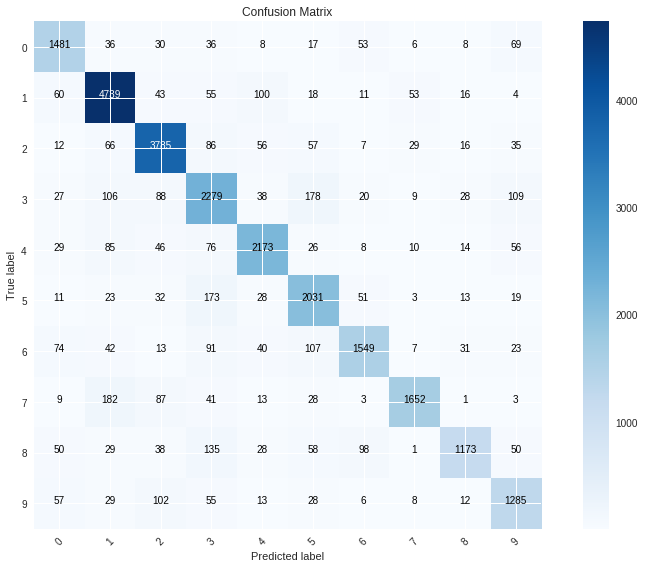

In [0]:
plot_confusion_matrix(cm, cm_plot_labels, title = "Confusion Matrix")

## Confusion Matrix as Percentages

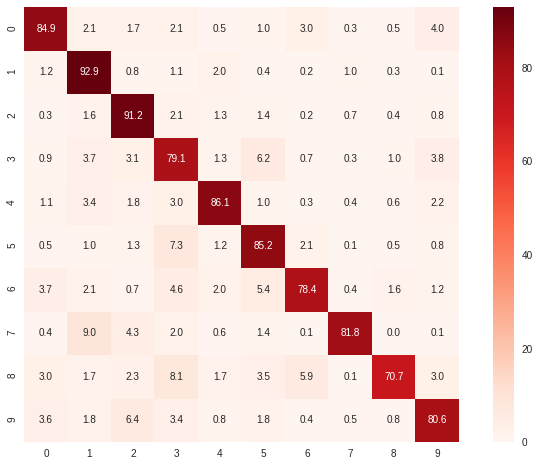

In [0]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);

## Vizualization of Loss of Training vs. Test over Epochs

[link text](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

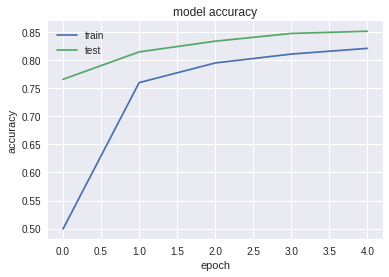

In [0]:
# summarize history for accuracy
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Vizualization of Loss of Training vs. Test over Epochs

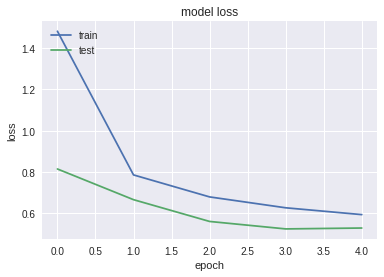

In [0]:
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()